# Exploration

Now that the dataset is clean, I'm ready for more exploration.

In [1]:
# Import modules
import os, sys, re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get path
data_dir = os.path.realpath('../data/')

### Analytics

To get a better feel for the data I'm working with, I'll answer the following questions:
- What rope length do you need to climb the vast majority of the routes?
- Are most climbs multipitch?
- What's the breakout of grades in BC?
    - Bulk
    - By location
    - By route type
    - By protection
    - By rating
    - By grade

In [8]:
# Read frame
df = pd.read_csv(data_dir + '/df_clean.csv', header=0, sep=',')
df_columnls = list(df.columns)
df.tail(2)

,route,location,url,avg_stars,route_type,rating,pitches,length,area_latitude,area_longitude,climbing_rating_complete,protection
943,Serps Up,Serpent's Den > Boulder Canyon > Boulder > Col...,https://www.mountainproject.com/route/12226557...,3.0,Sport,5.13b,1.0,25.0,40.00239,-105.41014,13.2,G
944,Aqueduct,Aqueduct Outcrop > Boulder Canyon > Boulder > ...,https://www.mountainproject.com/route/12246443...,2.0,Sport,5.12a,1.0,50.0,39.97527,-105.46080,12.1,G


The length listed above is the length of the climb in feet. To get rope length, I'll need to multiple by 2 and convert to meters (climbing rope length is most commonly referred to in meters).

In [15]:
# Add rope length
df['rope_length'] = df['length'] * 2 / 3.28

In [16]:
# Count nulls
df.isna().sum()

route                         0
location                      0
url                           0
avg_stars                     7
route_type                    0
rating                        0
pitches                       1
length                      197
area_latitude                 0
area_longitude                0
climbing_rating_complete      0
protection                    0
rope_length                 197
dtype: int64

Most of the variables are complete. There is 1 missing entry for "pitches," 7 missing entries for "avg_stars," and 197 missing entries for length. This means that all of the variables can be used, but since ~20% of the length entries are missing, that will be the least reliable variable.

In [17]:
# Describe frame
df.describe()

,avg_stars,pitches,length,area_latitude,area_longitude,climbing_rating_complete,rope_length
count,938.000000,944.000000,748.000000,945.000000,945.000000,945.000000,748.000000
mean,2.149893,1.090042,72.462567,39.996613,-105.415008,10.870053,44.184492
std,0.667579,0.364586,38.805145,0.010475,0.023808,1.488573,23.661674
min,0.000000,1.000000,18.000000,39.972070,-105.464800,3.000000,10.975610
25%,1.700000,1.000000,50.000000,39.993700,-105.418100,10.150000,30.487805
50%,2.000000,1.000000,65.000000,40.000100,-105.412400,11.150000,39.634146
75%,2.600000,1.000000,85.000000,40.003500,-105.397400,12.100000,51.829268
max,4.000000,4.000000,370.000000,40.013700,-105.313300,14.300000,225.609756


Take aways from this summary:
- Avg_stars: most of the climbs have at least one star, which is good. The median grade is 2.0.
- Pitches: the vast majority (> 75%) of the climbs in this dataset are single pitch.
- Length (in feet): a 60m rope will allow you to climb more than 75% of the routes in BC (keep in mind this variable is ~80% complete).
- Climbing grades: the climbs in this dataset are mostly intermediate to hard! An intermediate climber (around 5.10) will be able to climb about 25% of the routes, but most of the routes are for advanced climbers (around 5.11 and higher).

I'll look into the climbing grades in more detail next.

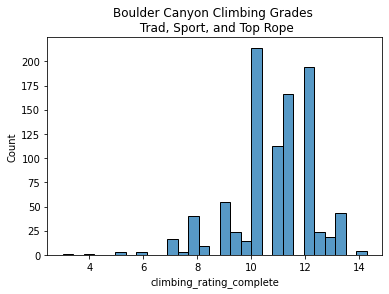

In [21]:
# Bulk breakout
plot = plt.figure()
ax1 = plot.add_subplot(111)
sns.histplot(data=df, x='climbing_rating_complete', ax=ax1)
ax1.set_title('Boulder Canyon Climbing Grades \n Trad, Sport, and Top Rope')
plt.show()
plt.close()

TODO: encode location, protection, route type for more analytics`